In [2]:
from sklearn.datasets import make_classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
Input_data = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=2, n_repeated=0, 
                                    n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, random_state=0)

X = Input_data[0]
Y = Input_data[1]

print(X.shape)

(100, 4)


In [6]:
input_dataframe = pd.DataFrame(Input_data[0],columns=['x'+str(i) for i in range(1,5)])
input_dataframe['y'] = Input_data[1]

In [8]:
input_dataframe.head()

,x1,x2,x3,x4,y
0,-0.071560,0.229554,0.216543,0.065274,1
1,-0.403257,2.006184,2.027512,0.850892,1
2,-1.130582,-0.020296,-0.710234,-1.440991,0
3,0.183325,-0.774610,-0.766055,-0.293669,0
4,-0.286920,-0.716953,-0.986585,-0.848215,0


In [9]:
from sklearn import svm
model = svm.SVC(kernel='linear') 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.25, random_state=0)

In [14]:
X_train.shape

(75, 4)

In [16]:
X_train[0]

array([-1.66130052,  2.39203665,  1.69989125, -0.47568347])

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
#fit the SVM model to the training data
fit_mod = model.fit(X_train, y_train)
print(fit_mod)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [30]:
def compute_accuracy(test_f,test_l,c):
    pred = c.predict(test_f)
    print (pred)
    pred_accu = accuracy_score(test_l,pred)
    return pred_accu;

In [33]:
def compute_confusion_matrix(test_f,test_l,c):
    pred = c.predict(test_f)
    x = confusion_matrix(test_l,pred)
    return x;

In [34]:
accu_percent = compute_accuracy(X_test,y_test,fit_mod)*100;
print ("Accuracy obtained over the whole training set is %0.6f %% ." % (accu_percent))

[1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1]
Accuracy obtained over the whole training set is 96.000000 % .


In [40]:
conf_mat = compute_confusion_matrix(X_test,y_test,fit_mod)
print(conf_mat)

[[13  0]
 [ 1 11]]


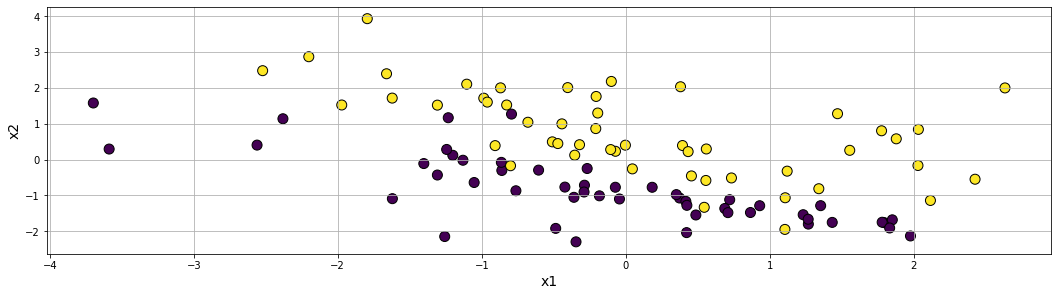

In [50]:
from itertools import combinations
from math import ceil

lst_var=list(combinations(input_dataframe.columns[:-1],4))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(input_dataframe[var1],input_dataframe[var2],s=100,c=input_dataframe['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)


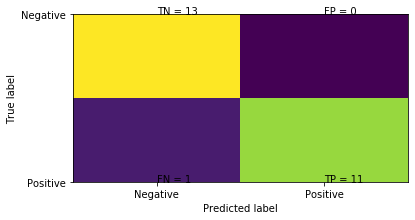

In [65]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest')
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat[i][j]))
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0, max_features = 'sqrt',n_jobs=-1, verbose = 1)


In [68]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)

In [70]:
#fit the training data and labels to the random forest
rf_fit = rf_model.fit(X_train, y_train)
print(rf_fit)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=1,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [71]:
n_nodes = []
max_depths = []

for ind_tree in rf_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 14
Average maximum depth 4


In [73]:
accu_percent_rf = compute_accuracy(X_test,y_test,rf_fit)*100;
print ("Accuracy obtained over the whole training set is %0.6f %% ." % (accu_percent_rf))

[1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1]
Accuracy obtained over the whole training set is 80.000000 % .


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [75]:
conf_mat_rf = compute_confusion_matrix(X_test,y_test,rf_fit)
print(conf_mat_rf)

[[11  2]
 [ 3  9]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [94]:
rf_model_1= RandomForestClassifier(n_estimators=50, random_state=0, max_features = 'sqrt',n_jobs=-1)
print(rf_model_1)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [95]:
rf_fit_1 = rf_model_1.fit(X_train, y_train)
print(rf_fit_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [96]:
accu_percent_rf_1 = compute_accuracy(X_test,y_test,rf_fit_1)*100;
print ("Accuracy obtained over the whole training set is %0.6f %% ." % (accu_percent_rf_1))

[1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1]
Accuracy obtained over the whole training set is 80.000000 % .


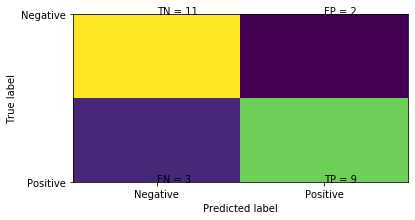

In [82]:
plt.clf()
plt.imshow(conf_mat_rf, interpolation='nearest')
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_rf[i][j]))
plt.show()

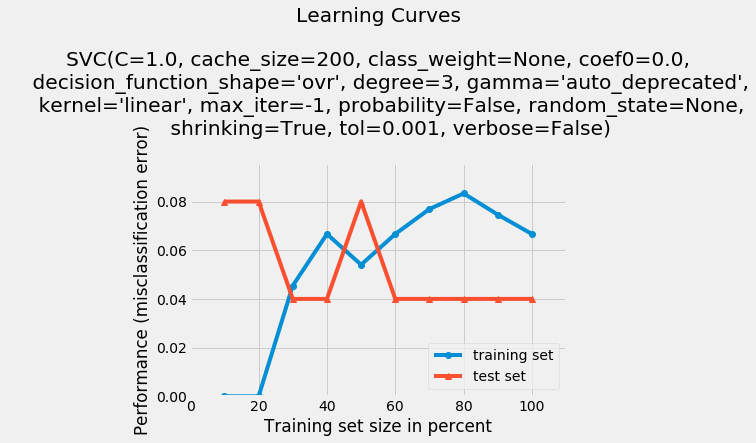

In [89]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison
import numpy as np
plot_learning_curves(X_train, y_train, X_test, y_test, fit_mod)
plt.show()

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_model = knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on test set:',knn.score(X_test, y_test)*100)

Accuracy of K-NN classifier on test set: 92.0


In [102]:
conf_mat_knn = compute_confusion_matrix(X_test,y_test,k_model)
print(conf_mat_knn)

[[13  0]
 [ 2 10]]


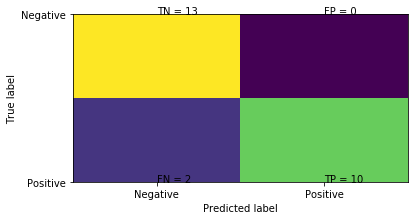

In [103]:
plt.clf()
plt.imshow(conf_mat_knn, interpolation='nearest')
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_knn[i][j]))
plt.show()

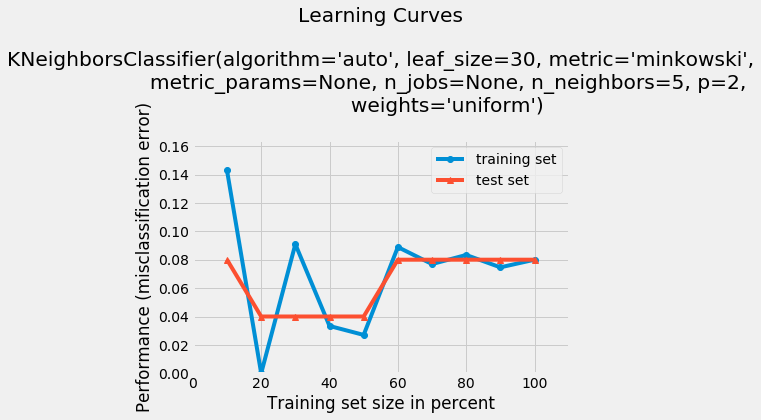

In [99]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison
import numpy as np
plot_learning_curves(X_train, y_train, X_test, y_test, k_model)
plt.show()

In [ ]:
#Summary of the code:
#Created a classification dataset of a binary classification problem, containing 100 samples and 4 features. random state set to some integer value to maintain the out.
#Tested algorithms: SVM, RF and KNN
#SVM provided an overall accuracy of 96% when using the tested data
#RF provided an overall accuracy of 80% on the testing data; changing the number of estimators from n=100 to n=50 did not impact the overall accuracy.
#KNN provided an overall accuracy of 92% on testing data.
#The confusion matrix for each algorithm is shown; confusion matrix tells us the information of how many TP,TN,FP,FN that are found.
#mlxtend package is used to plot the misclassification error performance.